In [303]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Import scikit learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [304]:
data = pd.read_csv('data_cleaned.csv')

In [305]:
#Overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21597 non-null  int64  
 1   date                21597 non-null  object 
 2   price               21597 non-null  float64
 3   bedrooms            21597 non-null  int64  
 4   bathrooms           21597 non-null  float64
 5   sqft_living         21597 non-null  int64  
 6   sqft_lot            21597 non-null  int64  
 7   floors              21597 non-null  float64
 8   waterfront          21597 non-null  float64
 9   view                21597 non-null  float64
 10  condition           21597 non-null  int64  
 11  grade               21597 non-null  int64  
 12  sqft_above          21597 non-null  int64  
 13  sqft_basement       21597 non-null  float64
 14  yr_built            21597 non-null  int64  
 15  yr_renovated        21597 non-null  int64  
 16  zipc

## V first shitty model

In [306]:
feats_in_control = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'grade_category',
                    'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement', 'has_been_renovated']

In [343]:
# Define X and y
X_cols = [c for c in data[feats_in_control].columns.to_list() if c not in ['price', 'grade_category']] 
#take out categoricals - aka grade_category

X = data[X_cols]
y = data['price']

In [308]:
model = sm.OLS(y, sm.add_constant(X))

In [309]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:43:12   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.657e+05   3.55e+04    -21.589      0.000   -8.35e+05   -6.96e+05
bedrooms           -4.305e+04   2246.246    -19.164      0.000   -4.75e+04   -3.86e+04
bathrooms          -2.123e+04   3678.188     -5.771      0.000   -2.84e+04    -1.4e+04
sqft_living          169.5554     25.379      6.681      0.000     119.810     219.301
floors              2208.1053   4109.824      0.537      0.591   -5847.454    1.03e+04
condition           6.259e+04   2655.114     23.572      0.000    5.74e+04    6.78e+04
grade               1.124e+05   2375.633     47.296      0.000    1.08e+05    1.17e+05
sqft_above            31.0099     25.367      1.222      0.222     -18.711      80.730
sqft_basement         66.1367     25.991      2.545      0.011      15.193     117.081
has_been_viewed     -2.42e+04   3.04e+04     -0.795      0.427   -8.39e+04    3.55e+04
has_basement        2.388e+04   6137.512      3.891      0.000    1.19e+04    3.59e+04
has_been_renovated  1.866e+05   9047.855     20.620      0.000    1.69e+05    2.04e+05
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                     8.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now with Scaler

In [310]:
# Instantiate a scaler and scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [311]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [312]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()
#same r-squared and p-values, look at coefficients to see how they impact y
# 1 scaled unit if [feature] increases/decreases price by coef #

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:43:12   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1640.951    329.258      0.000    5.37e+05    5.44e+05
x1         -3.987e+04   2080.647    -19.164      0.000    -4.4e+04   -3.58e+04
x2         -1.632e+04   2828.403     -5.771      0.000   -2.19e+04   -1.08e+04
x3          1.557e+05   2.33e+04      6.681      0.000     1.1e+05    2.01e+05
x4          1191.6489   2217.950      0.537      0.591   -3155.697    5538.995
x5          4.071e+04   1727.233     23.572      0.000    3.73e+04    4.41e+04
x6          1.318e+05   2787.027     47.296      0.000    1.26e+05    1.37e+05
x7          2.567e+04    2.1e+04      1.222      0.222   -1.55e+04    6.68e+04
x8          2.896e+04   1.14e+04      2.545      0.011    6651.599    5.13e+04
x9         -1305.2979   1641.465     -0.795      0.427   -4522.691    1912.095
x10         1.162e+04   2986.629      3.891      0.000    5767.705    1.75e+04
x11         3.403e+04   1650.148     20.620      0.000    3.08e+04    3.73e+04
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
# Compare to original 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:43:12   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.657e+05   3.55e+04    -21.589      0.000   -8.35e+05   -6.96e+05
bedrooms           -4.305e+04   2246.246    -19.164      0.000   -4.75e+04   -3.86e+04
bathrooms          -2.123e+04   3678.188     -5.771      0.000   -2.84e+04    -1.4e+04
sqft_living          169.5554     25.379      6.681      0.000     119.810     219.301
floors              2208.1053   4109.824      0.537      0.591   -5847.454    1.03e+04
condition           6.259e+04   2655.114     23.572      0.000    5.74e+04    6.78e+04
grade               1.124e+05   2375.633     47.296      0.000    1.08e+05    1.17e+05
sqft_above            31.0099     25.367      1.222      0.222     -18.711      80.730
sqft_basement         66.1367     25.991      2.545      0.011      15.193     117.081
has_been_viewed     -2.42e+04   3.04e+04     -0.795      0.427   -8.39e+04    3.55e+04
has_basement        2.388e+04   6137.512      3.891      0.000    1.19e+04    3.59e+04
has_been_renovated  1.866e+05   9047.855     20.620      0.000    1.69e+05    2.04e+05
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                     8.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now with Train-Test-Split

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [322]:
# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here
scaler = StandardScaler()

In [324]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [323]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [325]:
# Instantiate an sklearn linear model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [326]:
# Fit your model - ON THE TRAINING DATA!!

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [327]:
# Grab predictions for train and test set

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [342]:
# How'd we do?
from sklearn.metrics import r2_score

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_train_pred))}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5588979162038594
Mean Absolute Error: 156710.2345290629
Root Mean Squared Error: 395.86643521402885
---
Testing Scores:
R2: 0.5890000675400974
Mean Absolute Error: 154858.12822655207
Root Mean Squared Error: 393.52017512009735


## Learning: Testing > Training, model is underfit
Only assess model on test score

## K-fold - Revisit

In [330]:
# Scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [331]:
# Instantiate a fresh linear regression model
lr_fresh = LinearRegression()

In [332]:
# Let's use cross_val_score
# Set cv = 5
from sklearn.model_selection import cross_val_score

In [333]:
cross_val_score(lr_fresh, X_scaled, y)

array([0.57271874, 0.5451832 , 0.54826916, 0.58568239, 0.58250105])

In [334]:
# Look at the test scores across our folds
scores = cross_val_score(lr_fresh, X_scaled, y)

In [336]:
# Print it nicely
print(f"Scores: {scores.mean():.3f} +/- {scores.std():.3f}")
# Deciding which model to use and how well it does overall

Scores: 0.567 +/- 0.017


## First Shitty Model - with Scaler and SciKitLearn

In [344]:
# Reminder
feats_in_control = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'grade_category',
                    'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement', 'has_been_renovated']

In [264]:
# Define X and y
X_cols = [c for c in data[feats_in_control].columns.to_list() if c not in ['price', 'grade_category']]

X = data[X_cols]
y = data['price']

In [265]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [266]:
# Instantiate a scaler
scaler = StandardScaler()

In [267]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [268]:
# Instantiate a linear regression model
lr = LinearRegression()

In [269]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [341]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_train_pred))}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5588979162038594
Mean Absolute Error: 156710.2345290629
Root Mean Squared Error: 395.86643521402885
---
Testing Scores:
R2: 0.5890000675400974
Mean Absolute Error: 154858.12822655207
Root Mean Squared Error: 393.52017512009735


In [272]:
data[feats_in_control].corr().price.sort_values(ascending=False)

price                 1.000000
sqft_living           0.701917
grade                 0.667951
sqft_above            0.605368
bathrooms             0.525906
sqft_basement         0.322192
bedrooms              0.308787
floors                0.256804
has_basement          0.178264
has_been_renovated    0.117543
condition             0.036056
has_been_viewed      -0.012024
Name: price, dtype: float64

## Now try with statsmodels -- what do you put in  for X for scaled? 

In [368]:
model = sm.OLS(y, sm.add_constant(X))

In [369]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2334.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:28:59   Log-Likelihood:            -2.9791e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21583   BIC:                         5.960e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.911e+05   2.72e+04    -14.389      0.000   -4.44e+05   -3.38e+05
bedrooms               -3.441e+04   2229.720    -15.430      0.000   -3.88e+04      -3e+04
bathrooms              -1.504e+04   3622.381     -4.152      0.000   -2.21e+04   -7940.127
sqft_living              158.7660     24.936      6.367      0.000     109.890     207.642
floors                  1.417e+04   4070.160      3.482      0.000    6195.693    2.22e+04
condition               6.334e+04   2608.986     24.278      0.000    5.82e+04    6.85e+04
grade                   9.129e+04   2717.370     33.595      0.000     8.6e+04    9.66e+04
sqft_above                17.5060     24.925      0.702      0.482     -31.349      66.361
sqft_basement             61.8486     25.535      2.422      0.015      11.798     111.899
has_been_viewed        -2.366e+04   2.99e+04     -0.791      0.429   -8.23e+04    3.49e+04
has_basement            2.925e+04   6035.799      4.846      0.000    1.74e+04    4.11e+04
has_been_renovated      1.908e+05   8890.009     21.466      0.000    1.73e+05    2.08e+05
grade_category_Average -2.484e+05   1.01e+04    -24.646      0.000   -2.68e+05   -2.29e+05
grade_category_High     -4.14e+04   1.36e+04     -3.050      0.002    -6.8e+04   -1.48e+04
grade_category_Low     -1.013e+05   1.36e+04     -7.434      0.000   -1.28e+05   -7.46e+04
==============================================================================
Omnibus:                    16752.581   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096806.830
Skew:                           3.202   Prob(JB):                         0.00
Kurtosis:                      37.319   Cond. No.                     3.81e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Try with OHE grade_category

In [352]:
feats_in_control = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'grade_category',
                    'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement', 'has_been_renovated']

In [353]:
data_feats_in_control = data[feats_in_control]

In [354]:
data_feats_in_control.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,grade_category,sqft_above,sqft_basement,has_been_viewed,has_basement,has_been_renovated
0,325000.0,4,2.50,2240,2.0,4,8,Average,2240,0.0,1,0,0
1,540000.0,3,1.75,1630,2.0,3,8,Average,1020,610.0,1,1,0
2,344000.0,1,1.50,760,3.0,3,8,Average,760,0.0,1,0,0
3,565000.0,4,2.50,2500,1.0,3,9,Average,2500,0.0,1,0,0
4,320000.0,3,2.00,1250,1.0,5,7,Average,1250,0.0,1,0,0


In [355]:
data_OHE = pd.get_dummies(data_feats_in_control, columns=['grade_category'])

In [356]:
data_OHE

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,has_been_viewed,has_basement,has_been_renovated,grade_category_Average,grade_category_High,grade_category_Low
0,325000.0,4,2.50,2240,2.0,4,8,2240,0.0,1,0,0,1,0,0
1,540000.0,3,1.75,1630,2.0,3,8,1020,610.0,1,1,0,1,0,0
2,344000.0,1,1.50,760,3.0,3,8,760,0.0,1,0,0,1,0,0
3,565000.0,4,2.50,2500,1.0,3,9,2500,0.0,1,0,0,1,0,0
4,320000.0,3,2.00,1250,1.0,5,7,1250,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,279000.0,3,1.00,1530,1.0,3,7,970,560.0,1,1,0,1,0,0
21593,456000.0,3,2.50,2130,2.0,3,8,2130,0.0,1,0,0,1,0,0
21594,280000.0,2,1.00,1260,1.0,3,6,1100,160.0,1,1,0,1,0,0
21595,359950.0,3,1.75,1570,1.0,3,7,1040,530.0,1,1,0,1,0,0


In [357]:
data_OHE.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'has_been_viewed',
       'has_basement', 'has_been_renovated', 'grade_category_Average',
       'grade_category_High', 'grade_category_Low'],
      dtype='object')

In [358]:
# Define X and y
X_cols = [c for c in data_OHE.columns.to_list() if c not in ['price']]

X = data_OHE[X_cols]
y = data_OHE['price']

In [359]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [360]:
# Instantiate a scaler
scaler = StandardScaler()

In [361]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [362]:
# Instantiate a linear regression model
lr = LinearRegression()

In [363]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [364]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5752643218837833
Mean Absolute Error: 152937.84549158774
---
Testing Scores:
R2: 0.6013935420406358
Mean Absolute Error: 151694.2141391869
Root Mean Squared Error: 389.4794142688249


## Now try with statsmodels

In [365]:
model = sm.OLS(y, sm.add_constant(X))

In [366]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2334.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:27:52   Log-Likelihood:            -2.9791e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21583   BIC:                         5.960e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.911e+05   2.72e+04    -14.389      0.000   -4.44e+05   -3.38e+05
bedrooms               -3.441e+04   2229.720    -15.430      0.000   -3.88e+04      -3e+04
bathrooms              -1.504e+04   3622.381     -4.152      0.000   -2.21e+04   -7940.127
sqft_living              158.7660     24.936      6.367      0.000     109.890     207.642
floors                  1.417e+04   4070.160      3.482      0.000    6195.693    2.22e+04
condition               6.334e+04   2608.986     24.278      0.000    5.82e+04    6.85e+04
grade                   9.129e+04   2717.370     33.595      0.000     8.6e+04    9.66e+04
sqft_above                17.5060     24.925      0.702      0.482     -31.349      66.361
sqft_basement             61.8486     25.535      2.422      0.015      11.798     111.899
has_been_viewed        -2.366e+04   2.99e+04     -0.791      0.429   -8.23e+04    3.49e+04
has_basement            2.925e+04   6035.799      4.846      0.000    1.74e+04    4.11e+04
has_been_renovated      1.908e+05   8890.009     21.466      0.000    1.73e+05    2.08e+05
grade_category_Average -2.484e+05   1.01e+04    -24.646      0.000   -2.68e+05   -2.29e+05
grade_category_High     -4.14e+04   1.36e+04     -3.050      0.002    -6.8e+04   -1.48e+04
grade_category_Low     -1.013e+05   1.36e+04     -7.434      0.000   -1.28e+05   -7.46e+04
==============================================================================
Omnibus:                    16752.581   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096806.830
Skew:                           3.202   Prob(JB):                         0.00
Kurtosis:                      37.319   Cond. No.                     3.81e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## data_OHE learning - r-squared up to .584 from .569 with grade_category OHE

## data_OHE2 = has_been_viewed and sqft_above p > 0.05, remove from model and try again

In [177]:
data_OHE2 = data_OHE.drop(labels=['has_been_viewed', 'sqft_above'], axis=1)

In [178]:
data_OHE2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_basement', 'has_basement', 'has_been_renovated',
       'grade_category_Average', 'grade_category_High', 'grade_category_Low'],
      dtype='object')

In [179]:
# Define X and y
X_cols = [c for c in data_OHE2.columns.to_list() if c not in ['price']]

X = data_OHE2[X_cols]
y = data_OHE2['price']

In [180]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [181]:
# Instantiate a scaler
scaler = StandardScaler()

In [182]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
# Instantiate a linear regression model
lr = LinearRegression()

In [184]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [185]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5871392725690476
Mean Absolute Error: 150804.05010235554
---
Testing Scores:
R2: 0.575407629988153
Mean Absolute Error: 155711.17693788116
Root Mean Squared Error: 394.6025556656738


In [188]:
data_OHE.corr().price.sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
grade_category_High       0.559649
bathrooms                 0.525906
sqft_basement             0.322192
bedrooms                  0.308787
floors                    0.256804
has_basement              0.178264
has_been_renovated        0.117543
condition                 0.036056
has_been_viewed          -0.012024
grade_category_Low       -0.090469
grade_category_Average   -0.486572
Name: price, dtype: float64

## Now try with statsmodels

In [186]:
model = sm.OLS(y, sm.add_constant(X))

In [187]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2759.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:46:09   Log-Likelihood:            -2.9791e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21585   BIC:                         5.959e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.087e+05   1.54e+04    -26.546      0.000   -4.39e+05   -3.79e+05
bedrooms               -3.441e+04   2229.663    -15.431      0.000   -3.88e+04      -3e+04
bathrooms              -1.515e+04   3620.116     -4.185      0.000   -2.22e+04   -8052.966
sqft_living              176.0578      3.972     44.325      0.000     168.272     183.843
floors                  1.444e+04   4054.379      3.562      0.000    6496.744    2.24e+04
condition               6.327e+04   2606.738     24.270      0.000    5.82e+04    6.84e+04
grade                   9.134e+04   2716.405     33.626      0.000     8.6e+04    9.67e+04
sqft_basement             44.8461      7.770      5.772      0.000      29.616      60.076
has_basement            2.911e+04   6032.824      4.825      0.000    1.73e+04    4.09e+04
has_been_renovated      1.907e+05   8888.935     21.455      0.000    1.73e+05    2.08e+05
grade_category_Average -2.543e+05   6786.348    -37.475      0.000   -2.68e+05   -2.41e+05
grade_category_High    -4.723e+04   1.14e+04     -4.155      0.000   -6.95e+04   -2.49e+04
grade_category_Low     -1.072e+05   1.14e+04     -9.433      0.000   -1.29e+05   -8.49e+04
==============================================================================
Omnibus:                    16766.008   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1100836.038
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      37.383   Cond. No.                     2.40e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## data_OHE2 learning: Same R-squared, but more overfit (training > test)

## Try Min-Max Scaler on data_OHE

In [213]:
# Define X and y
X_cols = [c for c in data_OHE.columns.to_list() if c not in ['price', 'grade_category']]

X = data_OHE[X_cols]
y = data_OHE['price']

In [214]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [215]:
# Instantiate a scaler
scaler = MinMaxScaler()

In [216]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
# Instantiate a linear regression model
lr = LinearRegression()

In [218]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [219]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5864187298670336
Mean Absolute Error: 152557.58079170604
---
Testing Scores:
R2: 0.5777693658691203
Mean Absolute Error: 153028.56466058485
Root Mean Squared Error: 391.18865609905515


In [220]:
data_OHE.corr().price.sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
grade_category_High       0.559649
bathrooms                 0.525906
sqft_basement             0.322192
bedrooms                  0.308787
floors                    0.256804
has_basement              0.178264
has_been_renovated        0.117543
condition                 0.036056
has_been_viewed          -0.012024
grade_category_Low       -0.090469
grade_category_Average   -0.486572
Name: price, dtype: float64

## Now try with statsmodels

In [221]:
model = sm.OLS(y, sm.add_constant(X))

In [222]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2334.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:56:28   Log-Likelihood:            -2.9791e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21583   BIC:                         5.960e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.911e+05   2.72e+04    -14.389      0.000   -4.44e+05   -3.38e+05
bedrooms               -3.441e+04   2229.720    -15.430      0.000   -3.88e+04      -3e+04
bathrooms              -1.504e+04   3622.381     -4.152      0.000   -2.21e+04   -7940.127
sqft_living              158.7660     24.936      6.367      0.000     109.890     207.642
floors                  1.417e+04   4070.160      3.482      0.000    6195.693    2.22e+04
condition               6.334e+04   2608.986     24.278      0.000    5.82e+04    6.85e+04
grade                   9.129e+04   2717.370     33.595      0.000     8.6e+04    9.66e+04
sqft_above                17.5060     24.925      0.702      0.482     -31.349      66.361
sqft_basement             61.8486     25.535      2.422      0.015      11.798     111.899
has_been_viewed        -2.366e+04   2.99e+04     -0.791      0.429   -8.23e+04    3.49e+04
has_basement            2.925e+04   6035.799      4.846      0.000    1.74e+04    4.11e+04
has_been_renovated      1.908e+05   8890.009     21.466      0.000    1.73e+05    2.08e+05
grade_category_Average -2.484e+05   1.01e+04    -24.646      0.000   -2.68e+05   -2.29e+05
grade_category_High     -4.14e+04   1.36e+04     -3.050      0.002    -6.8e+04   -1.48e+04
grade_category_Low     -1.013e+05   1.36e+04     -7.434      0.000   -1.28e+05   -7.46e+04
==============================================================================
Omnibus:                    16752.581   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096806.830
Skew:                           3.202   Prob(JB):                         0.00
Kurtosis:                      37.319   Cond. No.                     3.81e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## data_OHE2 with Min-Max Scaler learning: Same R-squared, but overfit (training > testing)

## Stick with data_OHE with Standard Scaler - try removing grade and keeping grade_categories (seems like duplicative data)

In [223]:
data_OHE_no_grade = data_OHE.drop(labels=['grade'], axis=1)

In [224]:
data_OHE_no_grade.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement',
       'has_been_renovated', 'grade_category_Average', 'grade_category_High',
       'grade_category_Low'],
      dtype='object')

In [225]:
# Define X and y
X_cols = [c for c in data_OHE_no_grade.columns.to_list() if c not in ['price']]

X = data_OHE_no_grade[X_cols]
y = data_OHE_no_grade['price']

In [226]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [227]:
# Instantiate a scaler
scaler = StandardScaler()

In [228]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
# Instantiate a linear regression model
lr = LinearRegression()

In [230]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [231]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")

Training Scores:
R2: 0.5601645466140378
Mean Absolute Error: 161512.97696909276
---
Testing Scores:
R2: 0.5689158171409392
Mean Absolute Error: 158670.28231611825
Root Mean Squared Error: 398.3343850537112


In [232]:
data_OHE_no_grade.corr().price.sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
sqft_above                0.605368
grade_category_High       0.559649
bathrooms                 0.525906
sqft_basement             0.322192
bedrooms                  0.308787
floors                    0.256804
has_basement              0.178264
has_been_renovated        0.117543
condition                 0.036056
has_been_viewed          -0.012024
grade_category_Low       -0.090469
grade_category_Average   -0.486572
Name: price, dtype: float64

## Now try with statsmodels

In [233]:
model = sm.OLS(y, sm.add_constant(X))

In [234]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2314.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:58:02   Log-Likelihood:            -2.9846e+05
No. Observations:               21597   AIC:                         5.969e+05
Df Residuals:                   21584   BIC:                         5.971e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9552.2297   2.51e+04      0.381      0.703   -3.96e+04    5.87e+04
bedrooms               -4.355e+04   2270.109    -19.184      0.000    -4.8e+04   -3.91e+04
bathrooms               3736.3952   3671.300      1.018      0.309   -3459.624    1.09e+04
sqft_living              196.1520     25.553      7.676      0.000     146.066     246.238
floors                  3.743e+04   4114.277      9.098      0.000    2.94e+04    4.55e+04
condition               5.928e+04   2673.386     22.172      0.000     5.4e+04    6.45e+04
sqft_above                39.1017     25.559      1.530      0.126     -10.997      89.200
sqft_basement             50.5674     26.191      1.931      0.054      -0.770     101.905
has_been_viewed        -2.549e+04   3.07e+04     -0.831      0.406   -8.56e+04    3.46e+04
has_basement            4.405e+04   6174.930      7.134      0.000    3.19e+04    5.62e+04
has_been_renovated      1.828e+05   9116.001     20.057      0.000    1.65e+05    2.01e+05
grade_category_Average -1.043e+05   9355.184    -11.148      0.000   -1.23e+05    -8.6e+04
grade_category_High     2.336e+05   1.11e+04     21.024      0.000    2.12e+05    2.55e+05
grade_category_Low     -1.197e+05    1.4e+04     -8.573      0.000   -1.47e+05   -9.24e+04
==============================================================================
Omnibus:                    15190.506   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           716260.756
Skew:                           2.845   Prob(JB):                         0.00
Kurtosis:                      30.633   Cond. No.                     3.80e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Removing grade learning - r-squared worse than original. Keep both and re-explore differently

In [235]:
data_OHE.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'has_been_viewed',
       'has_basement', 'has_been_renovated', 'grade_category_Average',
       'grade_category_High', 'grade_category_Low'],
      dtype='object')

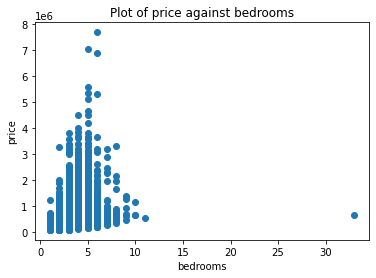

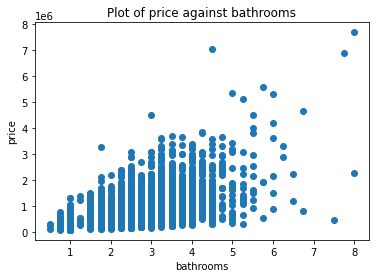

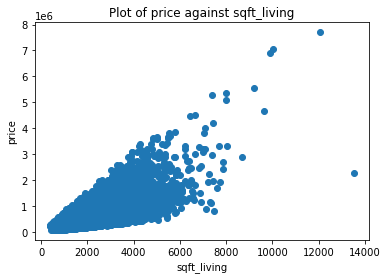

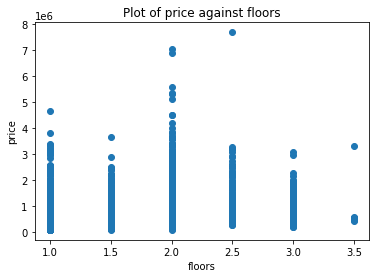

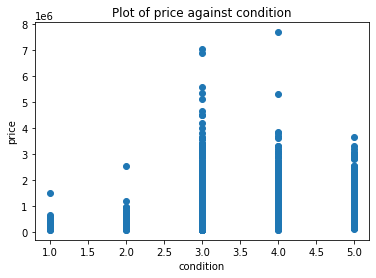

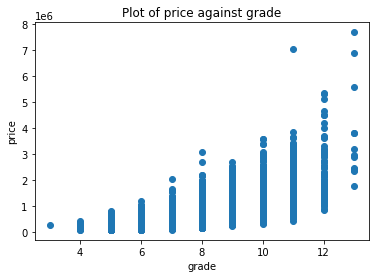

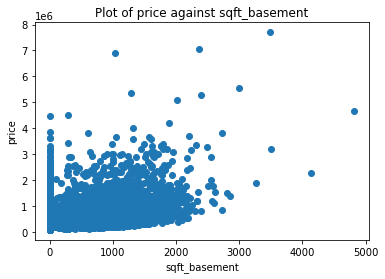

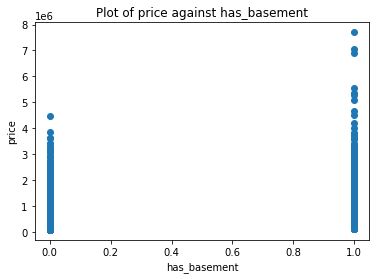

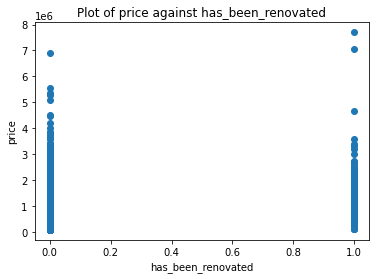

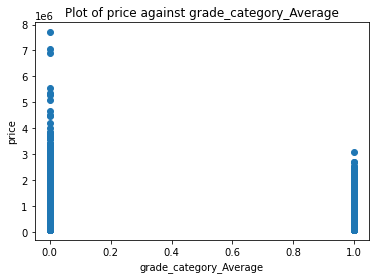

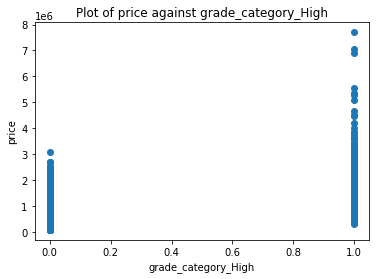

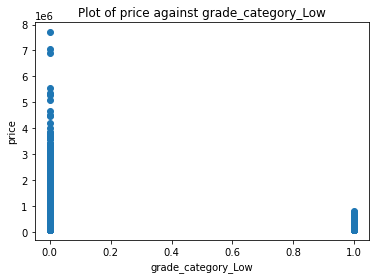

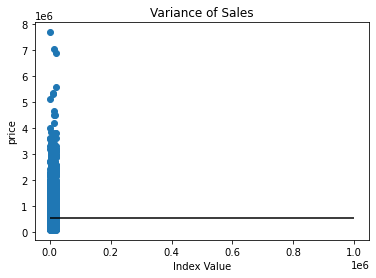

In [244]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
           'grade', 'sqft_basement', 'has_basement', 'has_been_renovated',
           'grade_category_Average', 'grade_category_High', 'grade_category_Low']

for x in features:
    plt.scatter(data_OHE[x], data_OHE['price'])
    plt.title(f'Plot of price against {x}')
    plt.xlabel(x)
    plt.ylabel('price')
    plt.show()
    
# also plot sales against itself
plt.scatter(data_OHE.index, data_OHE['price'])
plt.hlines(data_OHE['price'].mean(), 0, 1000000)
plt.xlabel('Index Value')
plt.ylabel('price')
plt.title('Variance of Sales')
plt.show()

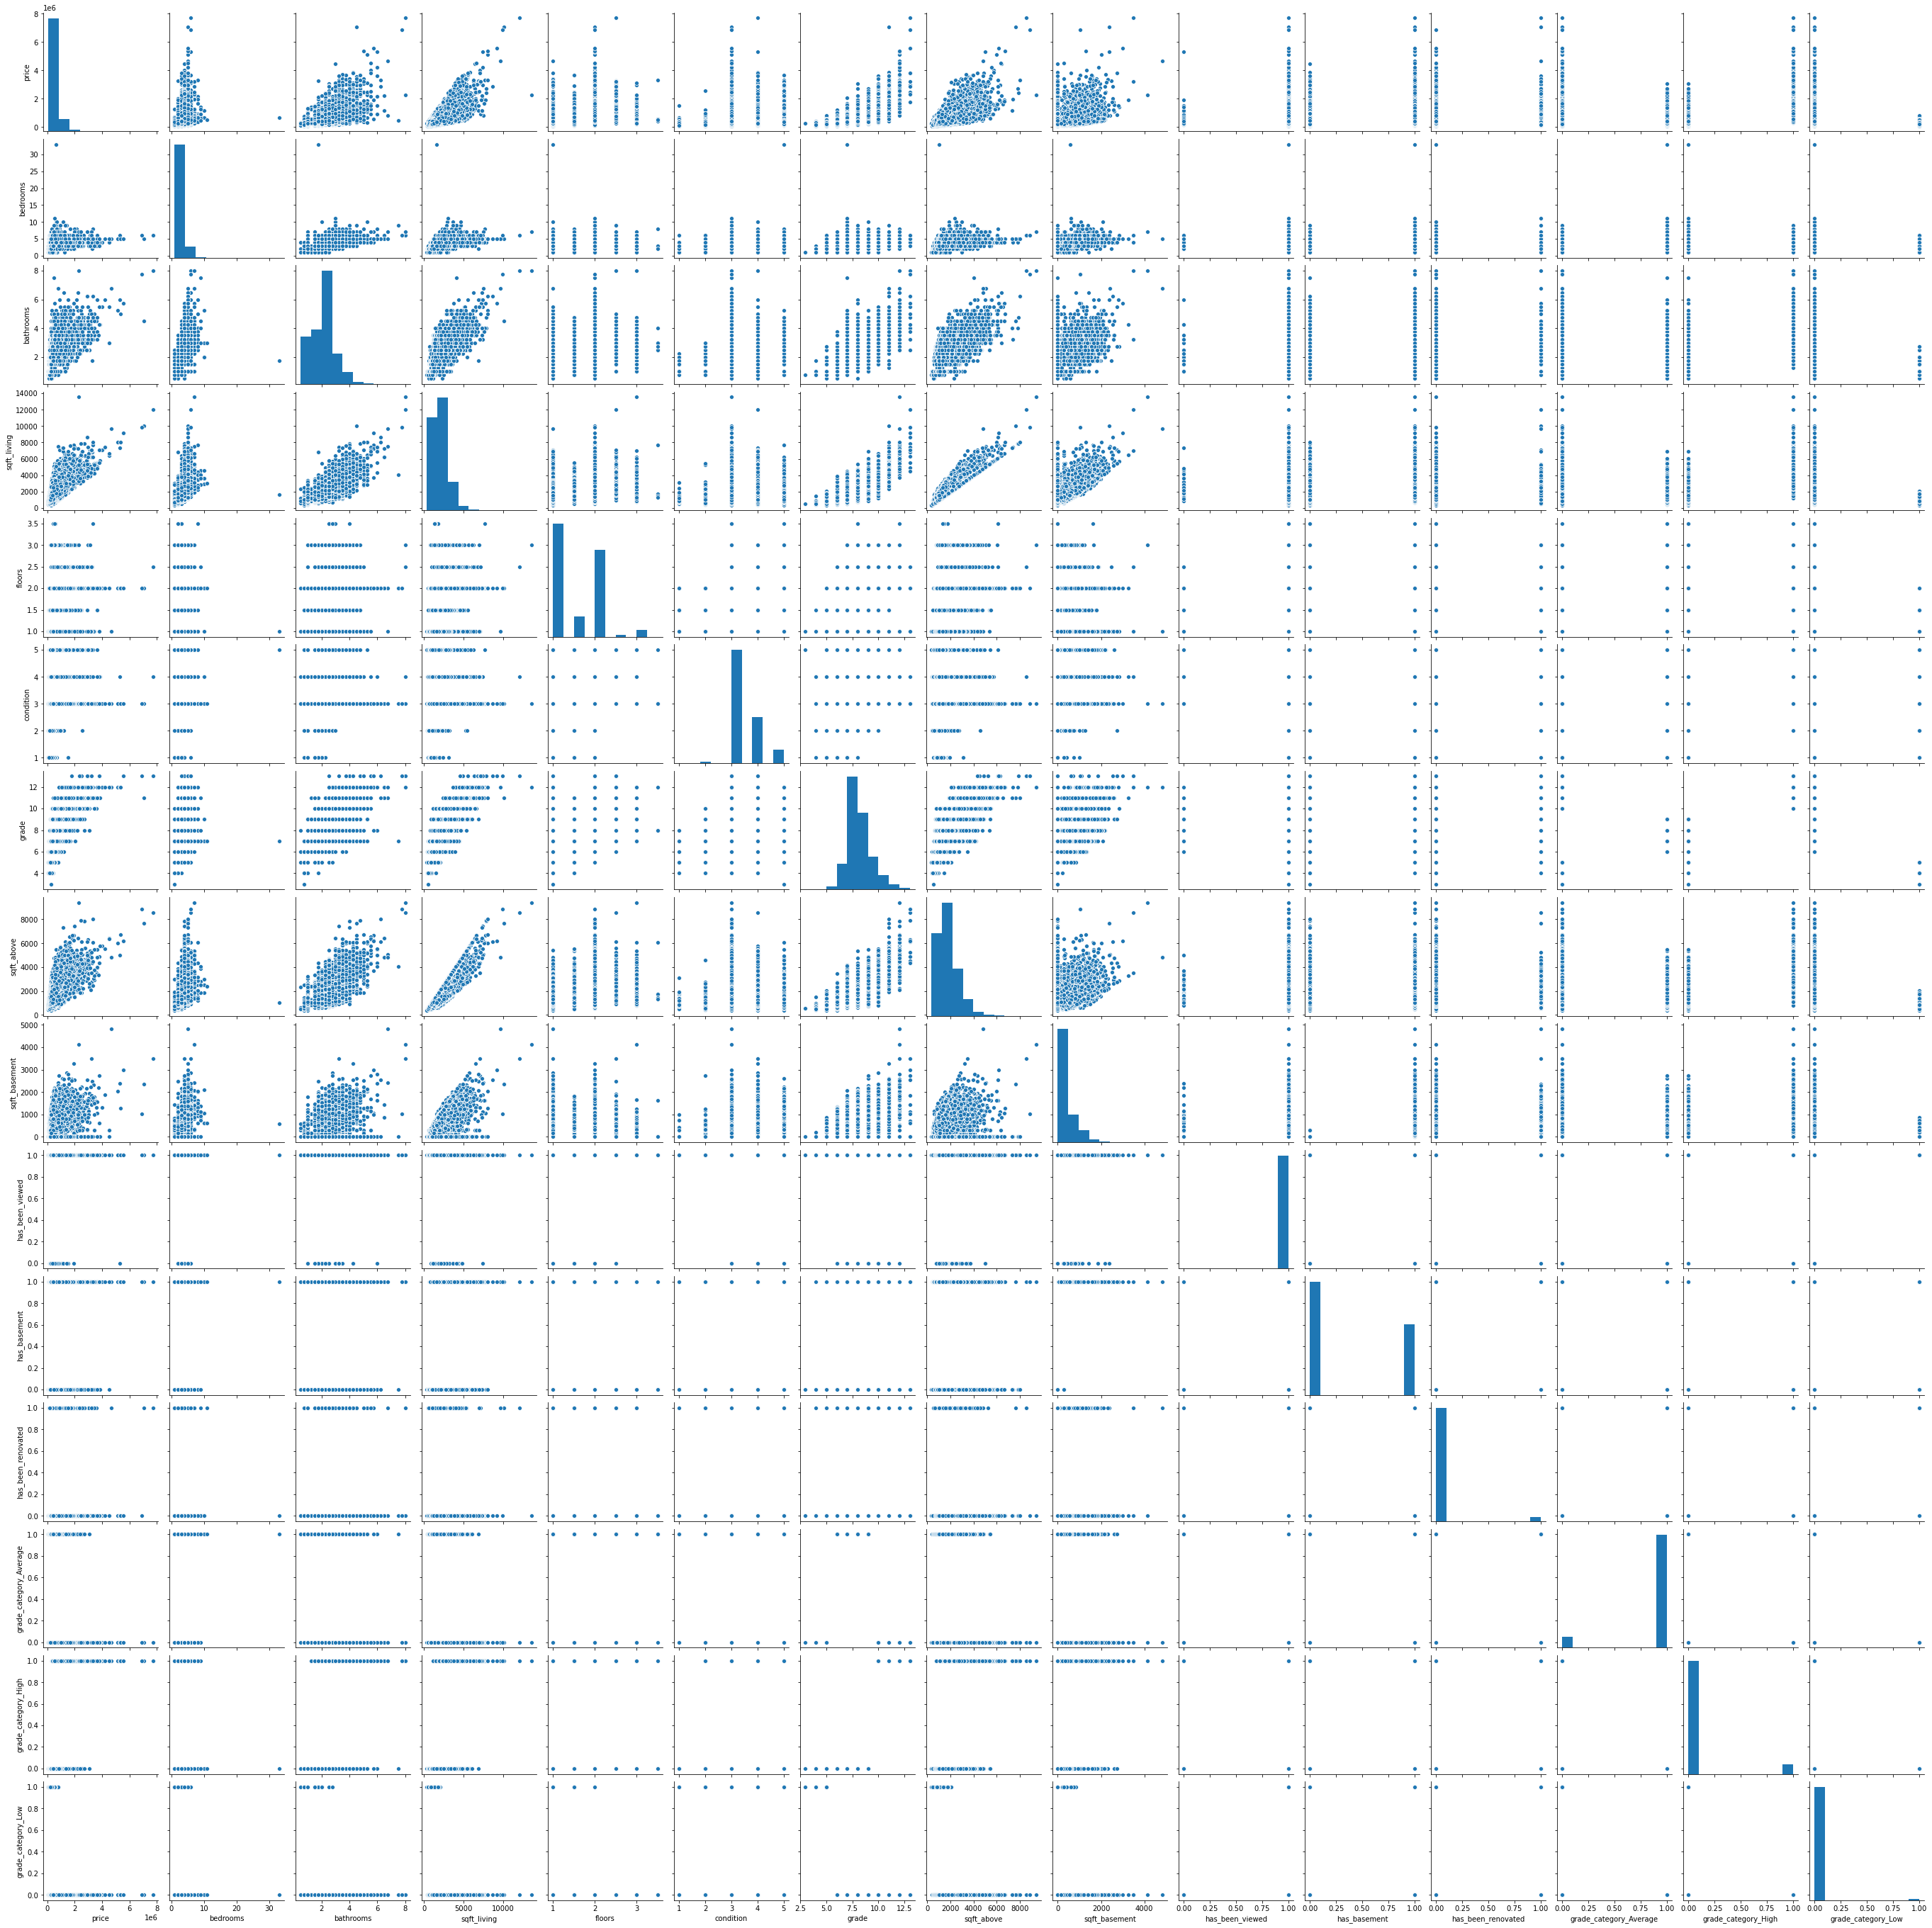

In [238]:
sns.pairplot(data_OHE)
plt.show()

In [245]:
data_OHE.corr()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,has_been_viewed,has_basement,has_been_renovated,grade_category_Average,grade_category_High,grade_category_Low
price,1.000000,0.308787,0.525906,0.701917,0.256804,0.036056,0.667951,0.605368,0.322192,-0.012024,0.178264,0.117543,-0.486572,0.559649,-0.090469
bedrooms,0.308787,1.000000,0.514508,0.578212,0.177944,0.026496,0.356563,0.479386,0.299037,-0.003233,0.158412,0.017635,-0.128683,0.192528,-0.129914
bathrooms,0.525906,0.514508,1.000000,0.755758,0.502582,-0.126479,0.665838,0.686668,0.279541,-0.002739,0.159863,0.046742,-0.317447,0.403277,-0.149857
sqft_living,0.701917,0.578212,0.755758,1.000000,0.353953,-0.059445,0.762779,0.876448,0.430190,-0.009948,0.201198,0.050829,-0.466748,0.558513,-0.138362
floors,0.256804,0.177944,0.502582,0.353953,1.000000,-0.264075,0.458794,0.523989,-0.242358,0.000999,-0.252465,0.003713,-0.173580,0.222227,-0.086027
condition,0.036056,0.026496,-0.126479,-0.059445,-0.264075,1.000000,-0.146896,-0.158904,0.169153,-0.002878,0.130542,-0.055383,0.073466,-0.082623,0.009191
grade,0.667951,0.356563,0.665838,0.762779,0.458794,-0.146896,1.000000,0.756073,0.166397,-0.007722,0.050701,0.015259,-0.514744,0.663253,-0.265217
sqft_above,0.605368,0.479386,0.686668,0.876448,0.523989,-0.158904,0.756073,1.000000,-0.051781,-0.000878,-0.207268,0.020566,-0.473191,0.557131,-0.118627
sqft_basement,0.322192,0.299037,0.279541,0.430190,-0.242358,0.169153,0.166397,-0.051781,1.000000,-0.020330,0.813546,0.065877,-0.082299,0.115093,-0.063951
has_been_viewed,-0.012024,-0.003233,-0.002739,-0.009948,0.000999,-0.002878,-0.007722,-0.000878,-0.020330,1.000000,-0.015418,0.005509,0.004368,-0.007240,0.006086


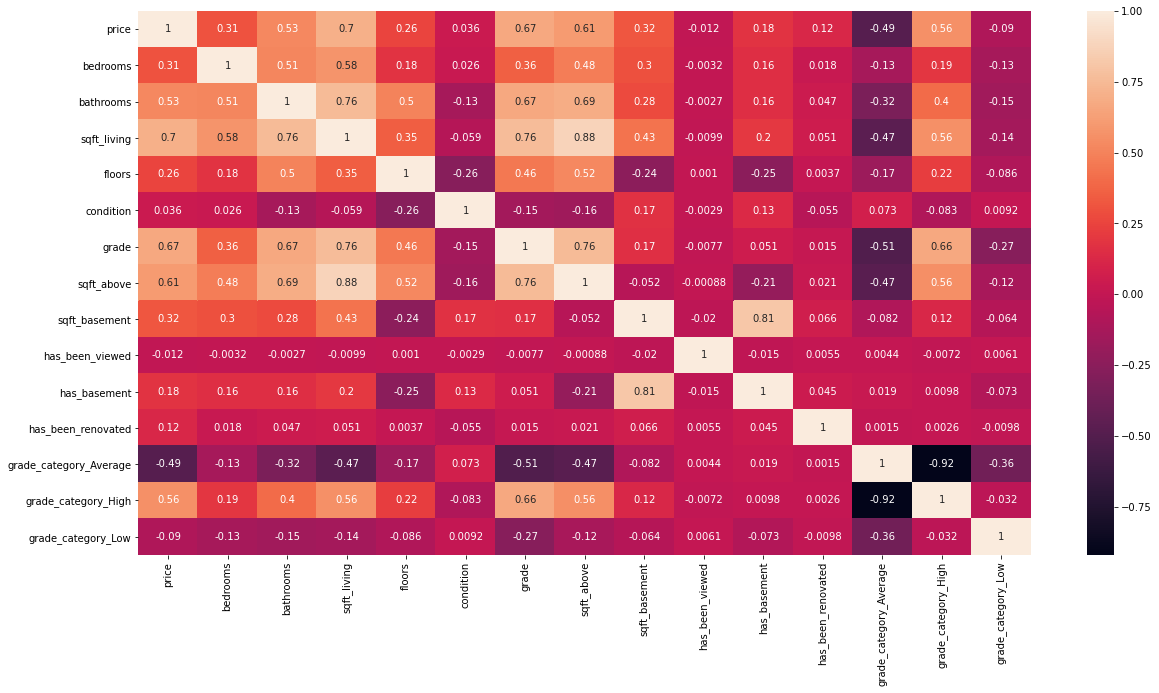

In [338]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data_OHE.corr(), annot=True)
# grade and sqft_above correlation?
# has_basement and sqft_basement

In [246]:
# Variance Inflation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a dataframe with just our X variables
X = data_OHE[features]

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# label the scores with their related columns
vif["features"] = data_OHE[features].columns

vif

,VIF,features
0,1.641398,bedrooms
1,2.982036,bathrooms
2,5.117223,sqft_living
3,1.842294,floors
4,1.106581,condition
5,3.908103,grade
6,4.453337,sqft_basement
7,3.316442,has_basement
8,1.011363,has_been_renovated
9,144.334261,grade_category_Average


In [29]:
# already defined X, just need to define y
y = data_OHE['price']

In [247]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

preds = lr.predict(X)

In [248]:
from sklearn.metrics import r2_score

r2_score(y, preds)

0.5843612339379629